In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\ADITYA\Downloads\weather_forecast_data.csv")
df.head(10)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
5,26.147353,48.217260,15.258547,59.766279,1049.738751,no rain
6,20.939680,40.799444,2.232566,45.827508,1014.173766,no rain
7,32.294325,51.848471,2.873621,92.551497,1006.041733,no rain
8,34.091569,48.057114,5.570206,82.524873,993.732047,no rain
9,19.586038,82.978293,5.760537,98.014450,1036.503457,rain


In [8]:
df.shape

(2500, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [5]:
# checking for null values
df.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [6]:
# checking for duplicated values
df.duplicated().sum()

0

### **The dataset does not contain any null or duplicate values**

In [7]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [17]:
df.describe().columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure'], dtype='object')

### **Univariate Analysis**

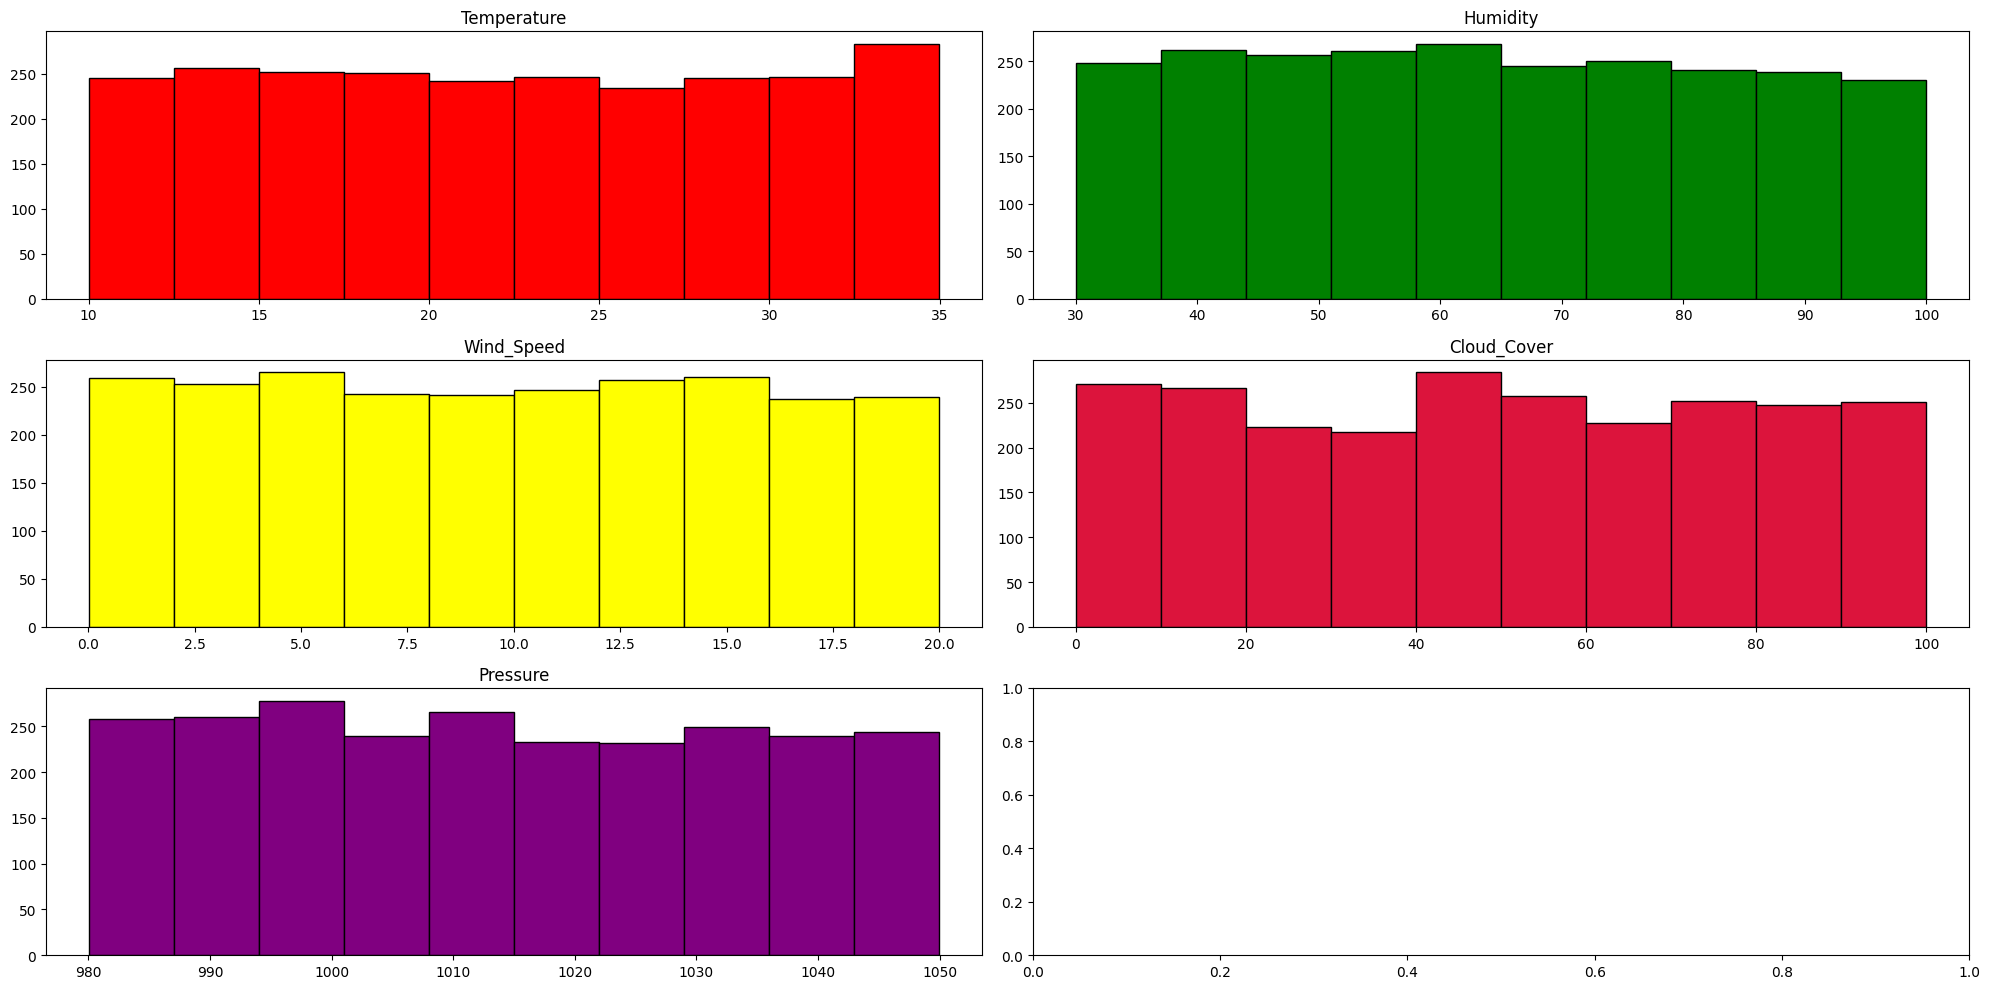

In [28]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 10))
row, col = 0, 0
colors = ["red", "green", "yellow","crimson", "purple"]
idx = 0

for column in df.describe().columns:
    if col <= 1:
        ax[row][col].hist(df[column], edgecolor = "k", color = colors[idx])
        ax[row][col].set_title(column)
        col += 1
    else:
        row += 1
        col = 0
        ax[row][col].hist(df[column], edgecolor = "k", color = colors[idx])
        ax[row][col].set_title(column)
        col += 1
    idx += 1

plt.tight_layout()


<Axes: xlabel='Rain'>

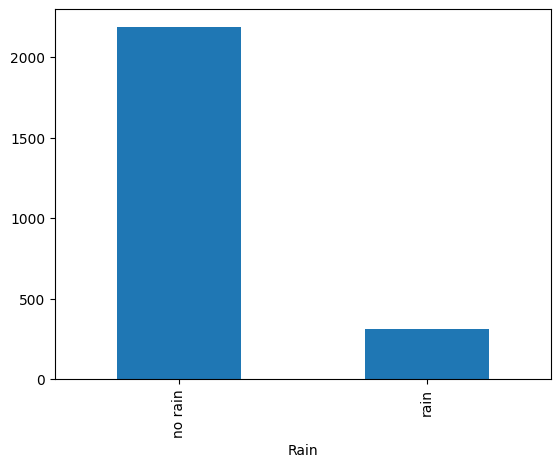

In [31]:
df["Rain"].value_counts().plot(kind="bar")

In [32]:
df["Rain"].value_counts() / 2500 * 100

Rain
no rain    87.44
rain       12.56
Name: count, dtype: float64

### **As we can nearly 87% data is categorised as no rain and 13% data is categorised as rain**

<Axes: ylabel='count'>

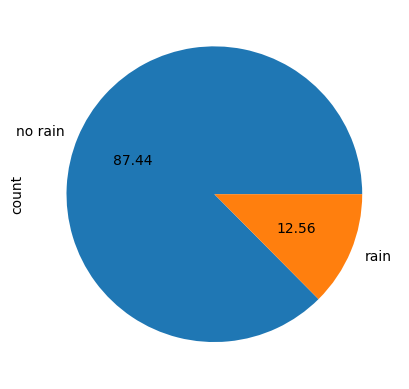

In [34]:
df["Rain"].value_counts().plot(kind = "pie", autopct = "%.2f")

In [35]:
# for plotting box plot we need seaborn library
import seaborn as sns

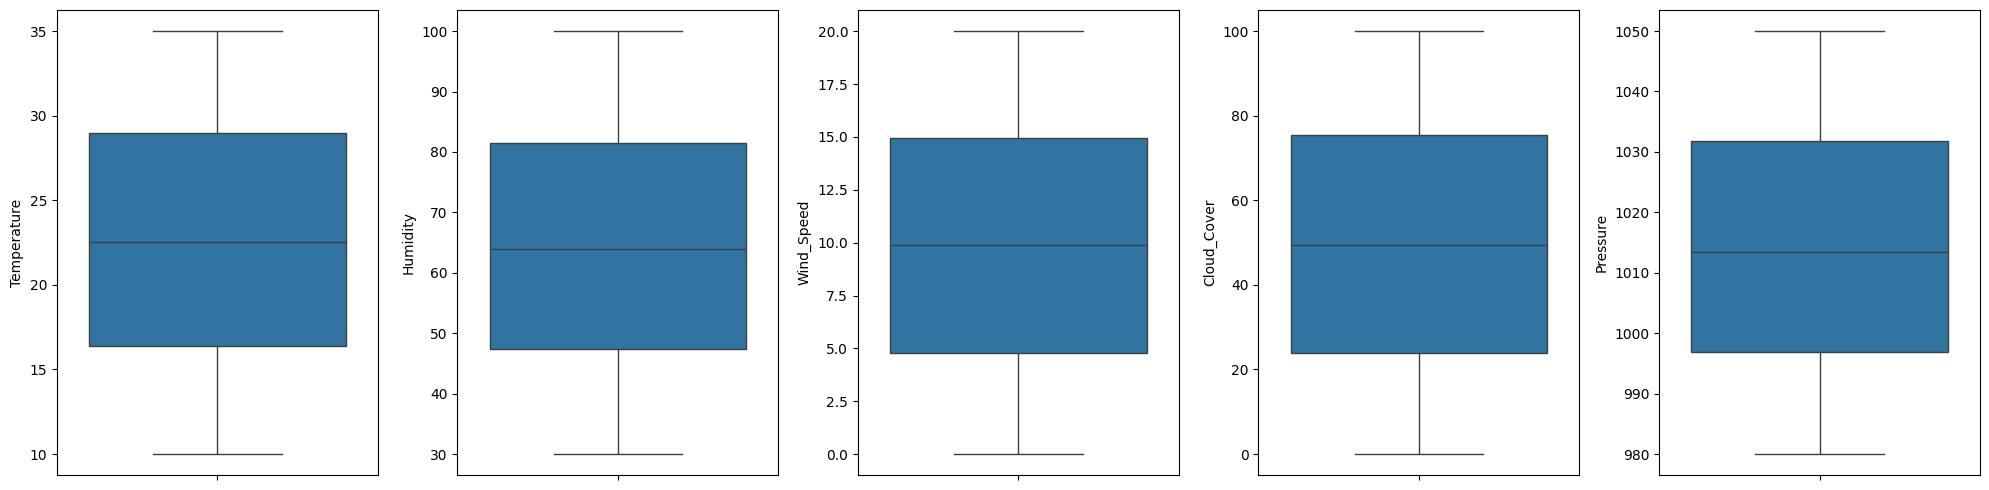

In [67]:
# checking outliers for every columns
ax, fig = plt.subplots(nrows = 1, ncols = 5, figsize = (20, 5))
col = 0

for column in df.describe().columns:
    sns.boxplot(df[column], ax = fig[col])
    col += 1

plt.tight_layout()

### **No outliers are present in any of the columns**

<Axes: ylabel='Temperature'>

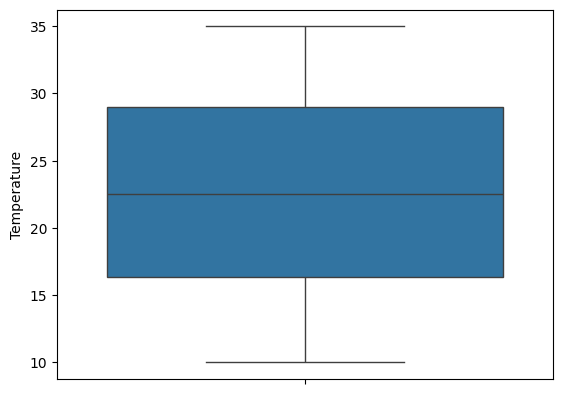

In [53]:
sns.boxplot(df["Temperature"])

### **Bivariate Analysis**

In [76]:
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


In [77]:
change_df = df.replace({"rain" : 1, "no rain" : 0})

In [78]:
change_df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,0
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,0
2497,28.108274,43.817178,2.897128,75.842952,999.119187,0
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,0


<Axes: >

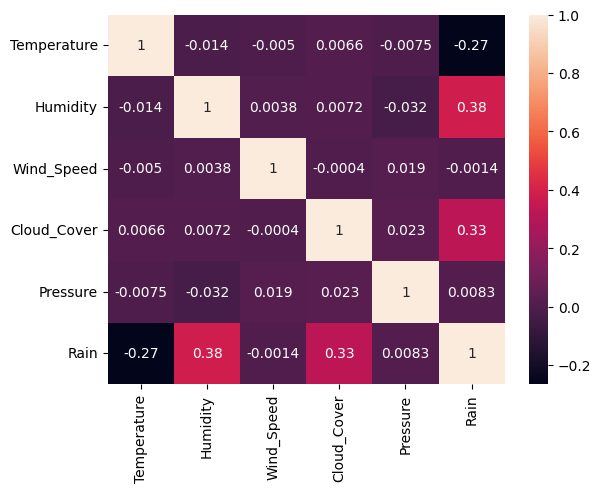

In [80]:
sns.heatmap(change_df.corr(), annot = True)

### **Implementing the KNN Model**

In [87]:
# extract the input and output features
X, y = df.iloc[:, :5].values, df.iloc[:, 5].values

In [90]:
X

array([[  23.7203376 ,   89.59264065,    7.33560439,   50.50169383,
        1032.37875869],
       [  27.87973416,   46.48970404,    5.95248359,    4.99005293,
         992.61418951],
       [  25.0690844 ,   83.07284289,    1.37199182,   14.85578394,
        1007.23162012],
       ...,
       [  28.10827448,   43.81717836,    2.89712751,   75.84295207,
         999.11918658],
       [  14.78927534,   57.90810538,    2.37471725,    2.37874275,
        1046.50187474],
       [  26.55435586,   97.10151721,   18.56308397,   81.357508  ,
        1001.72917591]])

In [91]:
y

array(['rain', 'no rain', 'no rain', ..., 'no rain', 'no rain', 'no rain'],
      dtype=object)

In [92]:
# perform train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [93]:
X_train.shape

(1875, 5)

In [94]:
X_test.shape

(625, 5)

In [95]:
# performing feature scaling, we will use Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [96]:
X_train_sc

array([[ 0.36997703, -0.29967717, -1.25269268, -0.73549049,  0.53843429],
       [-1.36896766, -0.53691481,  0.34540792, -1.68105195,  1.27688444],
       [-1.22836717,  1.29041789, -0.77714953,  0.71490603, -0.52490535],
       ...,
       [-1.70359965, -1.6838272 , -0.08094308,  0.14516609, -0.80902062],
       [-1.62622059, -1.57226519,  1.20897447,  0.99499695, -0.10939089],
       [ 1.48315722,  1.33391183, -1.29320713,  0.18747043,  1.65456635]])

In [97]:
X_test_sc

array([[ 0.70588353, -1.57761448,  1.44780157, -0.95912513, -0.27053962],
       [-0.20638668, -0.86744569,  0.95572193,  0.19906752,  1.31058101],
       [ 0.03166144,  0.29601676, -1.7321275 , -0.00560236,  0.42229399],
       ...,
       [-0.73479495,  0.68073982,  1.51857515,  0.11942959, -1.30099542],
       [-0.84399547,  0.15512577,  1.03192221,  1.21517178,  0.12281237],
       [ 1.6355416 , -1.23163665,  0.89806721, -0.13307001,  1.39165865]])

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_sc, y_train)
y_predict = model_knn.predict(X_test_sc)

In [100]:
# evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix

In [104]:
print(f"The accuracy score is : {accuracy_score(y_test, y_predict) * 100}\n")
print(f"The Confusion matrix is : \n{confusion_matrix(y_test, y_predict)}")

The accuracy score is : 97.76

The Confusion matrix is : 
[[548   8]
 [  6  63]]


### **As we know that n_neighbors is a hyperparameter so we train the KNN on the different values of n_neighbors and evaluate them and find that value of n_neighbors on which maximum accuracy is achieved**

In [117]:
values_k = [i for i in range(3, 25, 2)]
accuracies = []

for value in values_k:
    model = KNeighborsClassifier(n_neighbors = value)
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    accuracies.append(accuracy_score(y_test, y_pred))

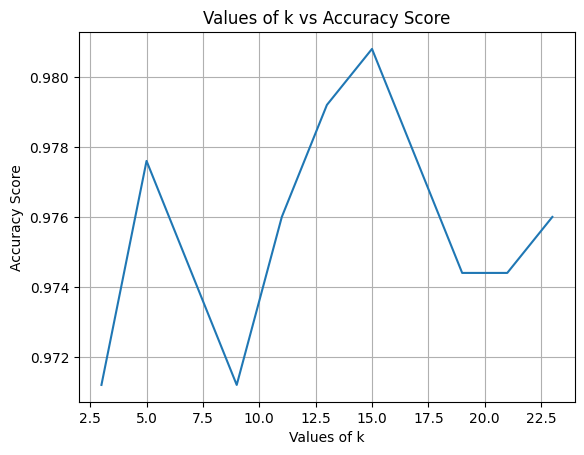

In [118]:
plt.plot(values_k, accuracies)
plt.xlabel("Values of k")
plt.ylabel("Accuracy Score")
plt.grid()
plt.title("Values of k vs Accuracy Score")
plt.show()

### **From the graph it is visible that the highest accuracy score is achieved at k = 15**

In [121]:
model_knn = KNeighborsClassifier(n_neighbors = 15)
model_knn.fit(X_train_sc, y_train)
y_predict = model_knn.predict(X_test_sc)

In [122]:
print(f"The accuracy score is : {accuracy_score(y_test, y_predict) * 100}\n")
print(f"The Confusion matrix is : \n{confusion_matrix(y_test, y_predict)}")

The accuracy score is : 98.08

The Confusion matrix is : 
[[551   5]
 [  7  62]]
